In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv('/content/titanic_dataset .csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

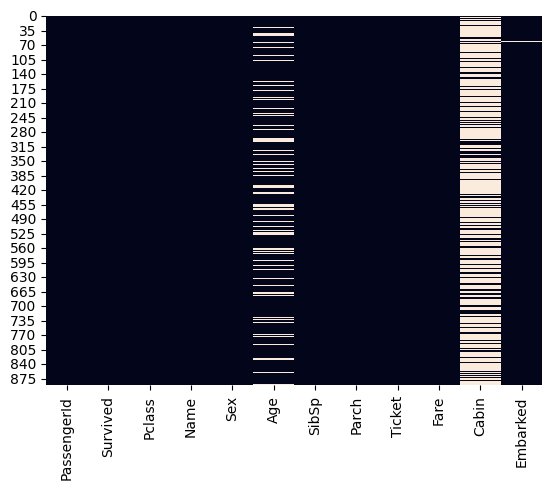

In [4]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and Cabin column have lots of missing values.

In [6]:
df['Age']=df['Age'].fillna(df['Age'].median())


In [7]:
drop_elements = ['Name','Cabin','Ticket']
df1 = df.drop(drop_elements, axis=1)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
df1=pd.get_dummies(df1, columns = ['Sex','Embarked'],dtype=int)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    int64  
 8   Sex_male     891 non-null    int64  
 9   Embarked_C   891 non-null    int64  
 10  Embarked_Q   891 non-null    int64  
 11  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [12]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


<Axes: >

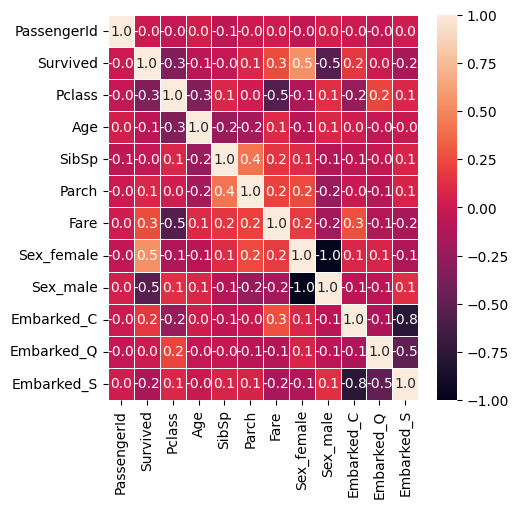

In [ ]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

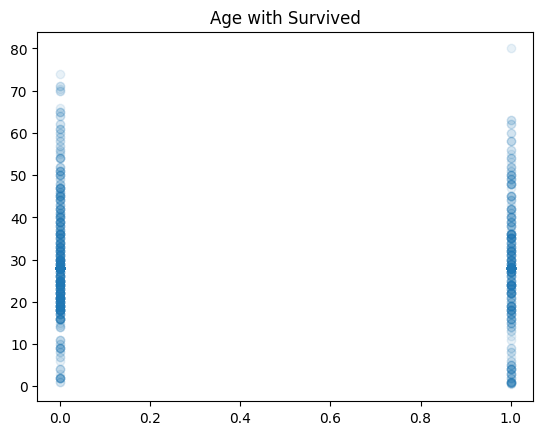

In [ ]:
plt.scatter(df1.Survived, df1.Age, alpha=0.1)
plt.title("Age with Survived")
plt.show()

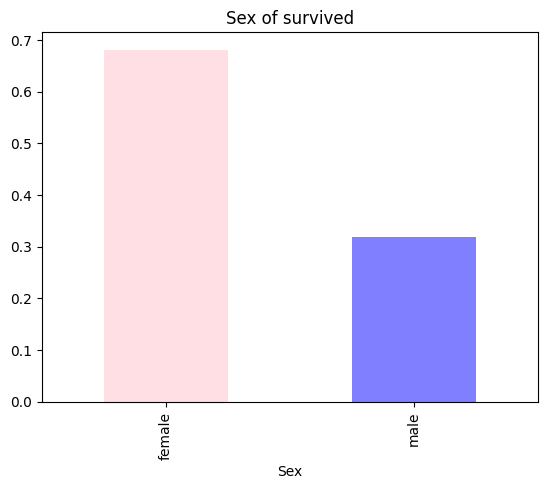

In [ ]:
female_color='pink'
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar', alpha=0.5,color=[female_color,'b'])
plt.title("Sex of survived")
plt.show()

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df1.drop("Survived",axis=1)
y = df1["Survived"]

mdlsel = SelectKBest(chi2, k=5)
mdlsel.fit(X,y)
ix = mdlsel.get_support()
df2 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
df2.head(n=5)

,Pclass,Age,Fare,Sex_female,Sex_male
0,3.0,22.0,7.2500,0.0,1.0
1,1.0,38.0,71.2833,1.0,0.0
2,3.0,26.0,7.9250,1.0,0.0
3,1.0,35.0,53.1000,1.0,0.0
4,3.0,35.0,8.0500,0.0,1.0


In [17]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(891, 1)

In [18]:
#splipt to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 11) (179, 11) (712, 1) (179, 1)


In [46]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)
X1=scalar.fit_transform(X)
y1=scalar.fit_transform(y)

In [47]:
#create logistic regression model
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_predict=log_model.predict(X_test)
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print("Accuary score",accuracy_score(y_test,y_predict))

Accuary score 0.7988826815642458


In [72]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(1,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

metric_k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[0.7597765363128491,
 0.7821229050279329,
 0.7932960893854749,
 0.8156424581005587,
 0.7877094972067039,
 0.7988826815642458,
 0.8044692737430168,
 0.8100558659217877,
 0.8212290502793296,
 0.8212290502793296,
 0.8100558659217877,
 0.7988826815642458,
 0.8044692737430168,
 0.7877094972067039]

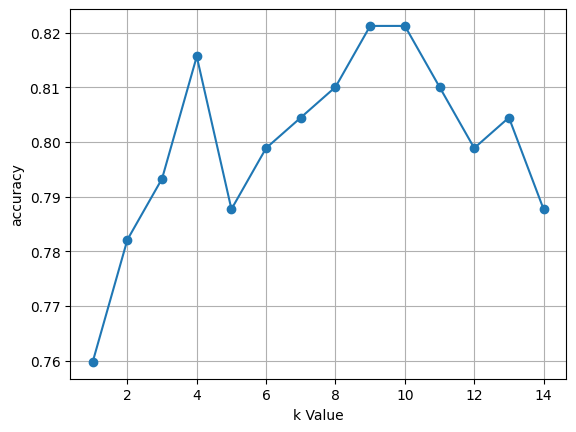

In [73]:
import matplotlib.pyplot as plt
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [74]:
classifier=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

print("accuarcy score",accuracy_score(y_test,y_pred_knn))


accuarcy score 0.7597765363128491


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# knn accuarcy score 0.8212290502793296

In [75]:

classifier=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
#p=2-euclidean distance
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

print("accuarcy score",accuracy_score(y_test,y_pred_knn))

accuarcy score 0.7597765363128491


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [76]:
classifier=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=1)
#p=1 for manhattan disctance
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

print("accuarcy score",accuracy_score(y_test,y_pred_knn))

accuarcy score 0.7597765363128491


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNeighborsClassifier-'minkowski'
# accuarcy score 0.8268156424581006

In [77]:
#apply kfold cross validation
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=10)

In [78]:
#checking the test and train data
for train_index,test_index in kf.split(X,y):
  print("training index",train_index)
  print("test index",test_index)

training index [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [79]:
#cross validation score-since it is classification it is accuaracy score
score=cross_val_score(classifier,X,y,cv=kf)
print("cross val score",format(score))

cross val score [0.53333333 0.6741573  0.49438202 0.4494382  0.66292135 0.62921348
 0.68539326 0.73033708 0.56179775 0.71910112]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

cross val score [0.53333333 0.6741573  0.49438202 0.4494382  0.66292135 0.62921348
 0.68539326 0.73033708 0.56179775 0.71910112]

In [80]:
#getting avg score
score=cross_val_score(classifier,X,y,cv=kf)
print("cross val score",score.mean())

cross val score 0.614007490636704


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

cross val score 0.614007490636704

In [81]:
#applying stratified kfold
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [82]:
for train_index,test_index in skfold_validator.split(X,y):
  print("training index",train_index)
  print("test index",test_index)

training index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [83]:
shcv_result=cross_val_score(classifier,X,y,cv=skfold_validator)
shcv_result

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

array([0.52222222, 0.64044944, 0.42696629, 0.37078652, 0.40449438,
       0.58426966, 0.49438202, 0.5505618 , 0.51685393, 0.68539326])

array([0.52222222, 0.64044944, 0.42696629, 0.37078652, 0.40449438,
       0.58426966, 0.49438202, 0.5505618 , 0.51685393, 0.68539326])

In [84]:
#getting the average for knn
print("average of cross val {}".format(shcv_result.mean()))

average of cross val 0.5196379525593009


In [57]:
#for LogisticRegression
shcv_result=cross_val_score(log_model,X,y,cv=skfold_validator)
shcv_result

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

array([0.76666667, 0.80898876, 0.75280899, 0.83146067, 0.78651685,
       0.7752809 , 0.7752809 , 0.78651685, 0.82022472, 0.78651685])

array([0.76666667, 0.80898876, 0.75280899, 0.83146067, 0.78651685,
       0.7752809 , 0.7752809 , 0.78651685, 0.82022472, 0.78651685])

In [58]:
#getting the average fot logistic
print("average of cross val {}".format(shcv_result.mean()))

average of cross val 0.7890262172284643


# **Apply SVM**

In [59]:

from sklearn.svm import SVC
svm_cl=SVC(kernel='linear')
svm_cl.fit(X_train,y_train)
y_svm_prediction=svm_cl.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:

from sklearn.metrics import confusion_matrix
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction))

confusion_matrix [[88 17]
 [22 52]]


In [61]:

print("accuracy_score",accuracy_score(y_test,y_svm_prediction))

accuracy_score 0.7821229050279329


In [62]:
from sklearn.svm import SVC
svm_cl=SVC(kernel='rbf')
svm_cl.fit(X_train,y_train)
y_svm_prediction_rbf=svm_cl.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction_rbf))

confusion_matrix [[96  9]
 [27 47]]


In [64]:
print("accuracy_score",accuracy_score(y_test,y_svm_prediction_rbf))

accuracy_score 0.7988826815642458


In [65]:
from sklearn.svm import SVC
svm_cl=SVC(kernel='poly')
svm_cl.fit(X_train,y_train)
y_svm_prediction_poly=svm_cl.predict(X_test)
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction_poly))

confusion_matrix [[96  9]
 [27 47]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print("accuracy_score",accuracy_score(y_test,y_svm_prediction_poly))

accuracy_score 0.7988826815642458


# **cross validation on SVM**

In [67]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=10)

In [68]:
#checking the test and train data
for train_index,test_index in kf.split(X,y):
  print("training index",train_index)
  print("test index",test_index)

training index [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [85]:
#cross validation score-since it is classification it is accuaracy score-SVM
score=cross_val_score(svm_cl,X,y,cv=kf)
print("cross val score",format(score))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

cross val score [0.56666667 0.7752809  0.62921348 0.51685393 0.58426966 0.61797753
 0.59550562 0.74157303 0.71910112 0.68539326]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cross val score [0.56666667 0.7752809  0.62921348 0.51685393 0.58426966 0.61797753
 0.59550562 0.74157303 0.71910112 0.68539326]

In [86]:
#getting avg score
score=cross_val_score(svm_cl,X,y,cv=kf)
print("cross val score",score.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

cross val score 0.643183520599251


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cross val score 0.643183520599251 for SVM

In [87]:
#applying stratified kfold
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [88]:
for train_index,test_index in skfold_validator.split(X,y):
  print("training index",train_index)
  print("test index",test_index)

training index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [89]:
shcv_result=cross_val_score(svm_cl,X,y,cv=skfold_validator)
shcv_result

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

array([0.61111111, 0.61797753, 0.62921348, 0.64044944, 0.61797753,
       0.59550562, 0.65168539, 0.73033708, 0.70786517, 0.6741573 ])

In [90]:
#getting the average
print("average of cross val {}".format(shcv_result.mean()))

average of cross val 0.6476279650436954


# knn accuarcy score 0.8212290502793296-best model selection

Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models